<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
%matplotlib inline

# Data Gathering

In [45]:
df = pd.read_csv("car_dataset.csv").copy()
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [46]:
df.shape

(301, 9)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


# Data Preparation

In [49]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [50]:
df.duplicated().value_counts()

False    299
True       2
dtype: int64

In [51]:
df = df.drop_duplicates(ignore_index = True)

In [52]:
df.duplicated().value_counts()

False    299
dtype: int64

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.567887,0.32,1.20,6.10,9.84,92.6
Kms_Driven,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


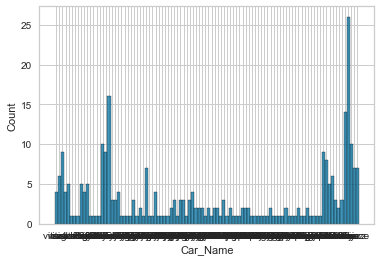

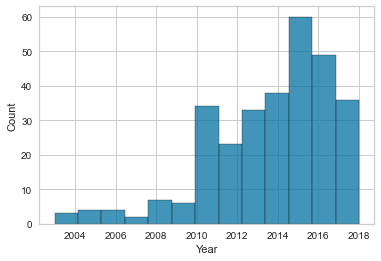

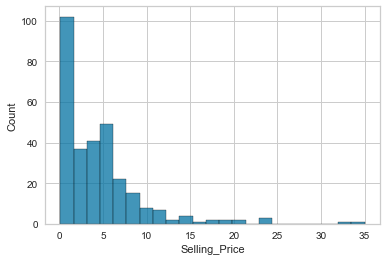

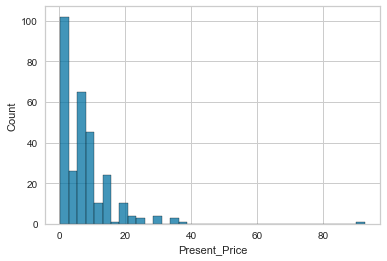

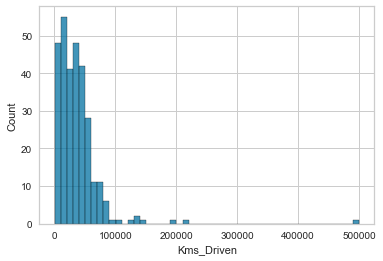

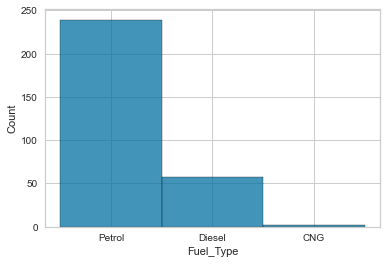

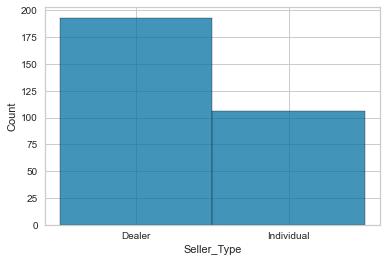

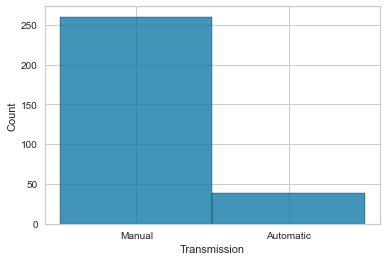

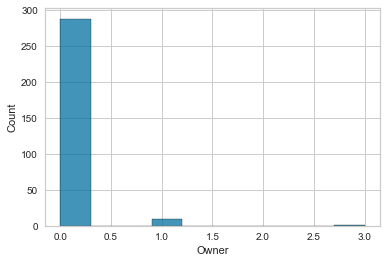

In [54]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

In [55]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [56]:
df["Vehicle_Age"]=2018-df.Year
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


In [57]:
df.Car_Name.value_counts()

city                   26
corolla altis          16
verna                  14
brio                   10
fortuner               10
                       ..
Activa 4g               1
800                     1
s cross                 1
Mahindra Mojo XT300     1
Yamaha FZ 16            1
Name: Car_Name, Length: 98, dtype: int64

In [58]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

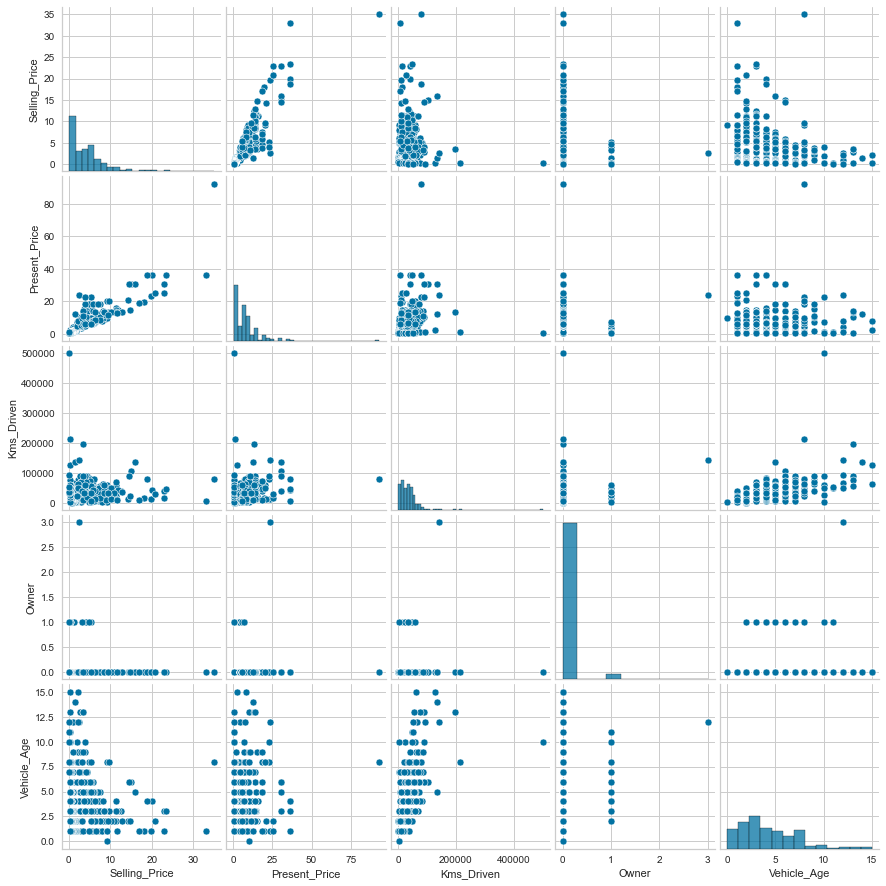

In [59]:
sns.pairplot(df)

In [60]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


In [61]:
df=pd.get_dummies(df, columns = ["Fuel_Type","Seller_Type","Transmission"], drop_first=True)
df.head()
# drop_first=True

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,4,0,1,0,1
1,4.75,9.54,43000,0,5,1,0,0,1
2,7.25,9.85,6900,0,1,0,1,0,1
3,2.85,4.15,5200,0,7,0,1,0,1
4,4.60,6.87,42450,0,4,1,0,0,1


In [62]:
df.shape

(299, 9)

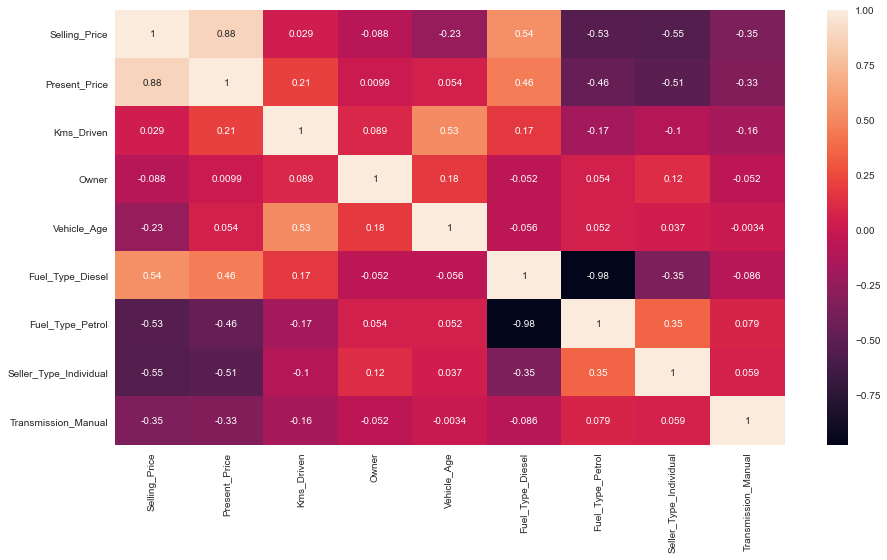

In [63]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Features and target variable

In [64]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

### Splitting data into training and testing

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (239, 8)
Train target shape   :  (239,)
Test features shape  :  (60, 8)
Test target shape    :  (60,)


##  Model Building (Linear Regression)

In [66]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [67]:
lm.fit(X_train, y_train)

LinearRegression()

In [68]:
lm.coef_

array([ 4.37186741e-01, -1.05181127e-05,  6.42855635e-01, -3.31040961e-01,
        2.13911103e+00,  6.90622132e-01, -1.30137688e+00, -1.57212521e+00])

In [69]:
y_pred = lm.predict(X_test)

In [70]:
y_train_pred = lm.predict(X_train)

# Interpret the model

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [72]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9049453218243145
MAE 		: 1.0398584752333493
MSE 		: 2.329305088849235
RMSE 		: 1.5262061095570398


In [73]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7528154215832913
MAE 		: 1.4728924140033006
MSE 		: 6.370752956823285
RMSE 		: 2.524035054594782


In [74]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [75]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.904945,0.752815
mae,1.039858,1.472892
mse,2.329305,6.370753
rmse,1.526206,2.524035


In [76]:
lm_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, "Residual" : (y_test - y_pred)})

lm_result_sample = lm_results.head(25)
lm_result_sample

,Actual,Predicted,Residual
281,8.99,7.501922,1.488078
265,8.35,7.791521,0.558479
164,0.45,1.366444,-0.916444
9,7.45,7.009419,0.440581
77,5.25,11.163290,-5.913290
278,5.25,4.534102,0.715898
93,5.85,8.492463,-2.642463
109,1.15,1.700782,-0.550782
5,9.25,8.824220,0.425780
173,0.38,-0.963488,1.343488


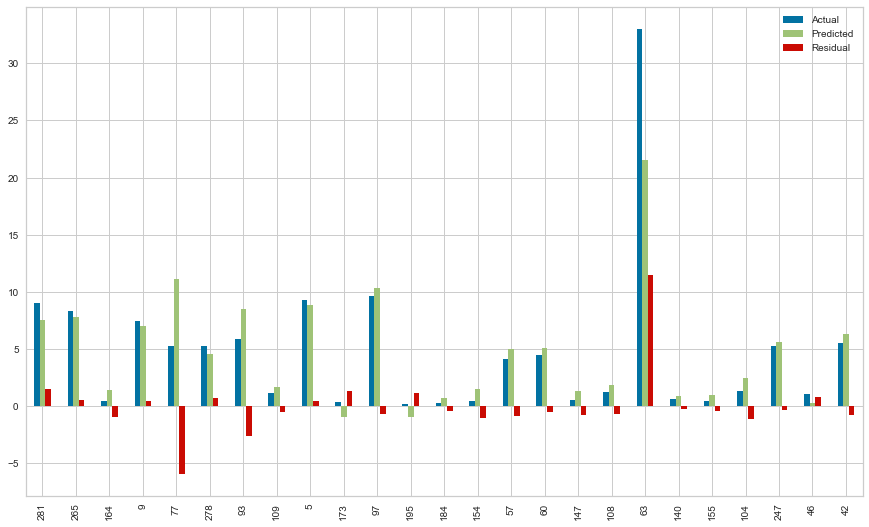

In [77]:
lm_result_sample.plot(kind = "bar", figsize = (15,9))
plt.show()

# Model Evaluation

In [78]:
from sklearn.model_selection import cross_validate, cross_val_score

In [79]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [80]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004021,0.002959,0.871976,-1.100779,-2.411142,-1.552785
2,0.002991,0.002992,0.856437,-1.074361,-1.675837,-1.294541
3,0.002992,0.003990,0.877535,-0.682646,-0.698819,-0.835954
4,0.004020,0.001962,0.856984,-1.242391,-3.074427,-1.753404
5,0.003988,0.002993,0.765354,-1.788789,-13.853180,-3.721986
6,0.003989,0.002993,0.883300,-0.915542,-1.704932,-1.305730
7,0.002990,0.001995,0.892861,-1.322036,-3.816524,-1.953593
8,0.002992,0.002992,0.877646,-0.978959,-1.925886,-1.387763
9,0.002992,0.004023,0.905630,-1.243109,-3.138702,-1.771638
10,0.002991,0.002991,0.951103,-0.764229,-0.978777,-0.989332


In [81]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.873883
test_neg_mean_absolute_error       -1.111284
test_neg_mean_squared_error        -3.327823
test_neg_root_mean_squared_error   -1.656673
dtype: float64

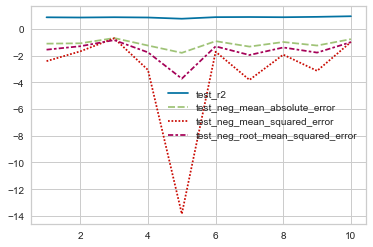

In [82]:
sns.lineplot(data = scores.iloc[:,2:]);

In [83]:
lm.coef_

array([ 4.37186741e-01, -1.05181127e-05,  6.42855635e-01, -3.31040961e-01,
        2.13911103e+00,  6.90622132e-01, -1.30137688e+00, -1.57212521e+00])

In [84]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,0.437187
1,-0.000011
2,0.642856
3,-0.331041
4,2.139111
5,0.690622
6,-1.301377
7,-1.572125


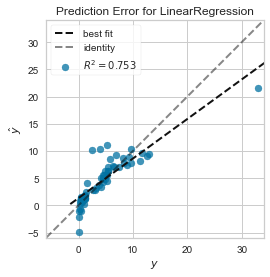

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [85]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm= LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

# Regularization

In [86]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler()

In [87]:
scaler.fit(X_train) 

MinMaxScaler()

In [88]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.08452536, 0.08609882, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.00281751, 0.00658824, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.00205895, 0.14823529, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.01278717, 0.08235294, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.10489814, 0.12752941, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.01246207, 0.01694118, 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [89]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.24403988e-01,  4.00470588e-02,  0.00000000e+00,
         7.14285714e-02,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 9.83961855e-02,  8.91011765e-02,  0.00000000e+00,
         7.14285714e-02,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 2.49241439e-03,  2.35294118e-03,  0.00000000e+00,
         7.14285714e-02,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [ 9.31946251e-02,  1.97021176e-01,  0.00000000e+00,
         1.42857143e-01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 2.43931513e-01,  3.74117647e-01,  0.00000000e+00,
         5.00000000e-01,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.04681404e-02,  6.57176471e-02,  0.00000000e+00,
         1.42857143e-01,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 1.98201127e-01,  3.364705

In [90]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7
mean,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7
mean,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Ridge

In [92]:
from sklearn.linear_model import Ridge

In [93]:
rm = Ridge(alpha=1, random_state=42)

In [94]:
rm.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [95]:
rm.coef_

array([22.4211895 , -0.72657289,  0.1721314 , -4.06802339,  2.10502706,
       -0.61362798, -2.50056964, -2.80543874])

In [96]:
y_pred = rm.predict(X_test_scaled)
y_train_pred = rm.predict(X_train_scaled)

In [97]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.836965,0.734593
mae,1.355656,1.381056
mse,3.995147,6.840392
rmse,1.998786,2.615414


In [98]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.904945,0.752815,0.836965,0.734593
mae,1.039858,1.472892,1.355656,1.381056
mse,2.329305,6.370753,3.995147,6.840392
rmse,1.526206,2.524035,1.998786,2.615414


In [99]:
rm_df = pd.DataFrame(rm.coef_, columns = ["rm_coef"])
rm_df

,rm_coef
0,22.421189
1,-0.726573
2,0.172131
3,-4.068023
4,2.105027
5,-0.613628
6,-2.500570
7,-2.805439


In [100]:
from sklearn.linear_model import RidgeCV

In [101]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [102]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [103]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [104]:
ridge_cv_model.alpha_

0.14

In [105]:
ridge_cv_model.best_score_

-1.631436433253888

In [106]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [107]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.901375,0.758952
mae,1.081178,1.436983
mse,2.416790,6.212600
rmse,1.554603,2.492509


In [108]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.904945,0.752815,0.836965,0.734593,0.901375,0.758952
mae,1.039858,1.472892,1.355656,1.381056,1.081178,1.436983
mse,2.329305,6.370753,3.995147,6.840392,2.416790,6.212600
rmse,1.526206,2.524035,1.998786,2.615414,1.554603,2.492509


In [109]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns = ["rm_cv_coef"])
rcm_df

,rm_cv_coef
0,36.230703
1,-1.811744
2,0.543893
3,-4.562247
4,2.113655
5,0.379373
6,-1.578800
7,-1.865603


In [110]:
from sklearn.model_selection import GridSearchCV

# Lasso

In [111]:
from sklearn.linear_model import Lasso, LassoCV

In [112]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [113]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [114]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.119784,0.126638
mae,3.069837,2.954088
mse,21.569607,22.509390
rmse,4.644309,4.744406


In [115]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.904945,0.752815,0.836965,0.734593,0.901375,0.758952,0.119784,0.126638
mae,1.039858,1.472892,1.355656,1.381056,1.081178,1.436983,3.069837,2.954088
mse,2.329305,6.370753,3.995147,6.840392,2.416790,6.212600,21.569607,22.509390
rmse,1.526206,2.524035,1.998786,2.615414,1.554603,2.492509,4.644309,4.744406


In [116]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef"])
lsm_df

,lasso_coef
0,0.000000
1,0.000000
2,-0.000000
3,-0.000000
4,0.000000
5,-0.000000
6,-1.280711
7,-0.000000


In [117]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [118]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001992,0.000997,0.163381,-2.956473,-12.852276,-3.585007
2,0.001996,0.000996,0.139452,-2.829335,-13.011224,-3.607107
3,0.001994,0.000998,0.070867,-3.445120,-34.875856,-5.905578
4,0.001995,0.001995,0.096795,-2.861533,-23.829314,-4.881528
5,0.001996,0.000995,0.105919,-3.337685,-24.229768,-4.922374


In [119]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.115283
test_neg_mean_absolute_error        -3.086029
test_neg_mean_squared_error        -21.759687
test_neg_root_mean_squared_error    -4.580319
dtype: float64

In [120]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso_CV")

,lasso_CV_train,lasso_CV_test
R2,0.119784,0.126638
mae,3.069837,2.954088
mse,21.569607,22.509390
rmse,4.644309,4.744406


<AxesSubplot:>

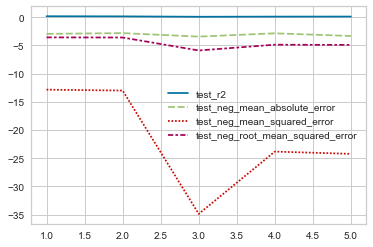

In [121]:
sns.lineplot(data = scores.iloc[:,2:])

In [122]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [123]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [124]:
lasso_cv_model.alpha_

0.03

In [125]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [126]:
#mse score for CV
lasso_cv_model.mse_path_[-1].mean()

3.0468620617009705

In [127]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [128]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.896416,0.752789
mae,1.100919,1.401858
mse,2.538327,6.371431
rmse,1.593213,2.524169


In [129]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.904945,0.752815,0.836965,0.734593,0.901375,0.758952,0.119784,0.126638,0.896416,0.752789
mae,1.039858,1.472892,1.355656,1.381056,1.081178,1.436983,3.069837,2.954088,1.100919,1.401858
mse,2.329305,6.370753,3.995147,6.840392,2.416790,6.212600,21.569607,22.509390,2.538327,6.371431
rmse,1.526206,2.524035,1.998786,2.615414,1.554603,2.492509,4.644309,4.744406,1.593213,2.524169


In [130]:
lasso_cv_model.coef_

array([35.20204197, -0.        ,  0.        , -4.56006054,  1.51341701,
       -0.        , -1.48461806, -1.72828658])

In [131]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [132]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,rm_coef,rm_cv_coef,lasso_coef,lasso_cv_coef_0.01
0,0.437187,22.421189,36.230703,0.000000,35.202042
1,-0.000011,-0.726573,-1.811744,0.000000,-0.000000
2,0.642856,0.172131,0.543893,-0.000000,0.000000
3,-0.331041,-4.068023,-4.562247,-0.000000,-4.560061
4,2.139111,2.105027,2.113655,0.000000,1.513417
5,0.690622,-0.613628,0.379373,-0.000000,-0.000000
6,-1.301377,-2.500570,-1.578800,-1.280711,-1.484618
7,-1.572125,-2.805439,-1.865603,-0.000000,-1.728287


## Elastic-Net 

In [133]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [134]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [135]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [136]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.186536,0.197857
mae,2.987531,2.814433
mse,19.933841,20.673846
rmse,4.464733,4.546850


In [137]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.904945,0.752815,0.836965,0.734593,0.901375,0.758952,0.119784,0.126638,0.896416,0.752789,0.186536,0.197857
mae,1.039858,1.472892,1.355656,1.381056,1.081178,1.436983,3.069837,2.954088,1.100919,1.401858,2.987531,2.814433
mse,2.329305,6.370753,3.995147,6.840392,2.416790,6.212600,21.569607,22.509390,2.538327,6.371431,19.933841,20.673846
rmse,1.526206,2.524035,1.998786,2.615414,1.554603,2.492509,4.644309,4.744406,1.593213,2.524169,4.464733,4.546850


In [138]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [139]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.240687,-2.787943,-11.664680,-3.415359
2,0.168058,-2.768203,-12.578705,-3.546647
3,0.121049,-3.285035,-32.992250,-5.743888
4,0.156678,-2.908703,-22.249409,-4.716928
5,0.181301,-3.261240,-22.186885,-4.710296


In [140]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.173555
test_neg_mean_absolute_error        -3.002225
test_neg_mean_squared_error        -20.334386
test_neg_root_mean_squared_error    -4.426624
dtype: float64

In [141]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.186536,0.197857
mae,2.987531,2.814433
mse,19.933841,20.673846
rmse,4.464733,4.546850


In [142]:
elastic_model.coef_

array([ 0.        ,  0.        , -0.        , -0.        ,  0.57082274,
       -0.55166933, -0.98737766, -0.22921653])

In [143]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [144]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,rm_coef,rm_cv_coef,lasso_coef,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,0.437187,22.421189,36.230703,0.000000,35.202042,0.000000
1,-0.000011,-0.726573,-1.811744,0.000000,-0.000000,0.000000
2,0.642856,0.172131,0.543893,-0.000000,0.000000,-0.000000
3,-0.331041,-4.068023,-4.562247,-0.000000,-4.560061,-0.000000
4,2.139111,2.105027,2.113655,0.000000,1.513417,0.570823
5,0.690622,-0.613628,0.379373,-0.000000,-0.000000,-0.551669
6,-1.301377,-2.500570,-1.578800,-1.280711,-1.484618,-0.987378
7,-1.572125,-2.805439,-1.865603,-0.000000,-1.728287,-0.229217


In [145]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [146]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [147]:
elastic_cv_model.alpha_

0.01

In [148]:
elastic_cv_model.l1_ratio_

0.95

In [149]:
#mse score for CV
elastic_cv_model.mse_path_[5][-1].mean()

3.0468620617009705

In [150]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [151]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.898865,0.763917
mae,1.097769,1.404820
mse,2.478309,6.084640
rmse,1.574265,2.466706


In [152]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.904945,0.752815,0.836965,0.734593,0.901375,0.758952,0.119784,0.126638,0.896416,0.752789,0.186536,0.197857,0.898865,0.763917
mae,1.039858,1.472892,1.355656,1.381056,1.081178,1.436983,3.069837,2.954088,1.100919,1.401858,2.987531,2.814433,1.097769,1.404820
mse,2.329305,6.370753,3.995147,6.840392,2.416790,6.212600,21.569607,22.509390,2.538327,6.371431,19.933841,20.673846,2.478309,6.084640
rmse,1.526206,2.524035,1.998786,2.615414,1.554603,2.492509,4.644309,4.744406,1.593213,2.524169,4.464733,4.546850,1.574265,2.466706


In [153]:
elastic_cv_model.coef_

array([35.2500709 , -1.04632212,  0.1751055 , -4.57906815,  1.70341447,
       -0.        , -1.57745766, -1.86384957])

In [154]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [155]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,rm_coef,rm_cv_coef,lasso_coef,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,0.437187,22.421189,36.230703,0.000000,35.202042,0.000000,35.250071
1,-0.000011,-0.726573,-1.811744,0.000000,-0.000000,0.000000,-1.046322
2,0.642856,0.172131,0.543893,-0.000000,0.000000,-0.000000,0.175105
3,-0.331041,-4.068023,-4.562247,-0.000000,-4.560061,-0.000000,-4.579068
4,2.139111,2.105027,2.113655,0.000000,1.513417,0.570823,1.703414
5,0.690622,-0.613628,0.379373,-0.000000,-0.000000,-0.551669,-0.000000
6,-1.301377,-2.500570,-1.578800,-1.280711,-1.484618,-0.987378,-1.577458
7,-1.572125,-2.805439,-1.865603,-0.000000,-1.728287,-0.229217,-1.863850


In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [158]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [159]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [160]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ...........................alpha=0.7, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [161]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.95}

In [162]:
grid_model.best_index_  # en iyi parametreleri aldıgı index i verir

4

In [163]:
grid_model.best_score_

-1.6372903294804868

In [164]:
y_pred = grid_model.predict(X_test_scaled)  
y_train_pred = grid_model.predict(X_train_scaled)

In [165]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.898865,0.763917
mae,1.097769,1.404820
mse,2.478309,6.084640
rmse,1.574265,2.466706
